# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

## Import

In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Code

### Task 1

Generate a random adjacency matrix for a simple undirected weighted graph of
100 vertices and 500 edges with assigned random positive integer weights.

In [65]:
num_vertices = 100
num_edges = 500

# create target matrix
adjacency_matrix = np.zeros((num_vertices, num_vertices))
for _ in range(num_edges):
    i, j = np.random.randint(0, 99), np.random.randint(0, 99)
    if i != j and adjacency_matrix[i, j] == 0:
        weight = np.random.randint(0, 1000)
        adjacency_matrix[i, j], adjacency_matrix[j, i] = weight, weight

In [66]:
adjacency_dict = dict(map(lambda i: (i, []), range(num_vertices)))
for k, v in adjacency_dict.items():
    for i in range(num_vertices):
        if adjacency_matrix[k, i] == 0:
            continue
        adjacency_dict[k].append([i, adjacency_matrix[k, i]])

In [67]:
adjacency_list = []
for k in adjacency_dict:
    temp_adjacency_list = []
    for temp_value in adjacency_dict[k]:
        temp_adjacency_list.append([k, temp_value[0], temp_value[1]])
    adjacency_list.extend(temp_adjacency_list)

Visualisation

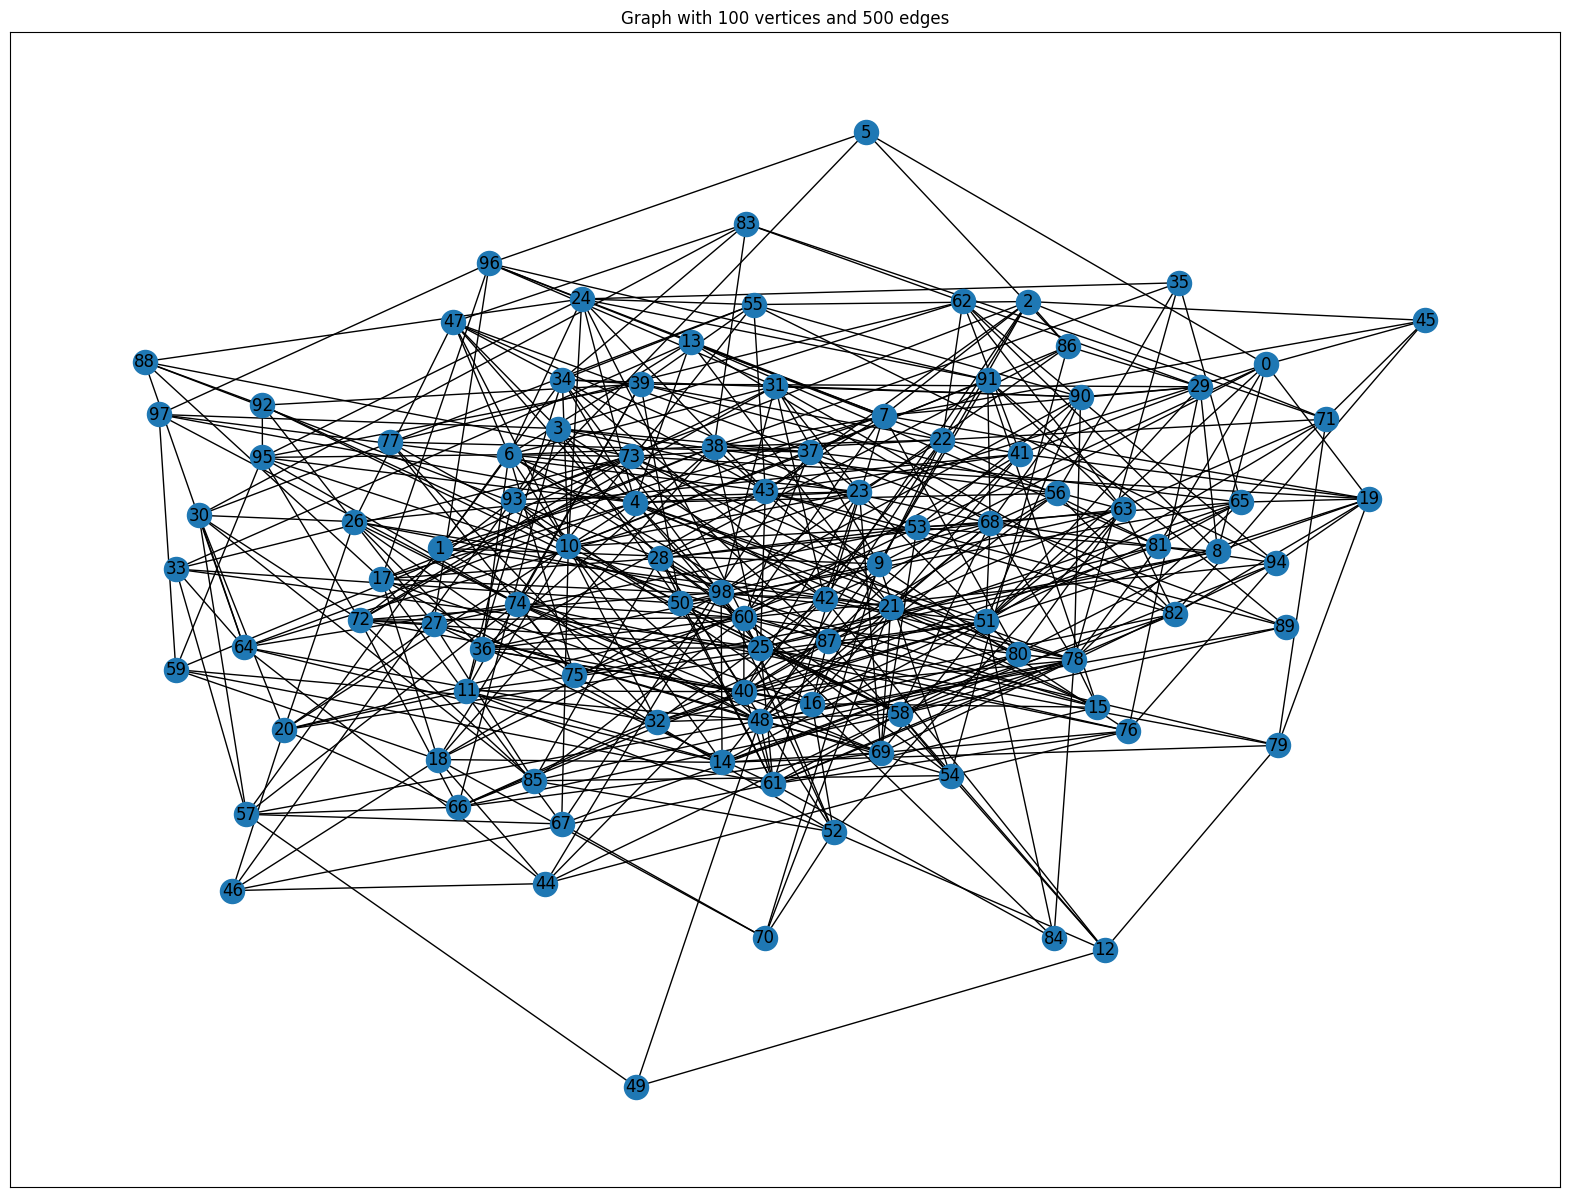

In [68]:
visualize = [i[0:2] for i in adjacency_list]
G = nx.Graph()
plt.figure(figsize=(20, 15))
plt.title(f'Graph with {num_vertices} vertices and {num_edges} edges')
G.add_edges_from(visualize)
nx.draw_networkx(G)
plt.show()

### Dijkstra's algorithms

In [69]:
G = nx.DiGraph()
G.add_weighted_edges_from(adjacency_list)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
def dijkstra_algorithm(start_vertex, target_vertex, G=G):
    shortest_path = nx.reconstruct_path(start_vertex, target_vertex, predecessors)
    print(f"Shortest path between {start_vertex} to {target_vertex}: {' -> '.join(list(map(str, shortest_path)))}")

In [70]:
start_vertex = np.random.randint(0, 99)

In [71]:
time_list = []
for _ in range(10):
    temp_start_time = time.time()
    target_vertex = np.random.randint(0, 99)
    dijkstra_algorithm(start_vertex, target_vertex, G=G)
    time_list.append(time.time() - temp_start_time)

Shortest path between 45 to 42: 45 -> 0 -> 53 -> 8 -> 58 -> 60 -> 42
Shortest path between 45 to 38: 45 -> 38
Shortest path between 45 to 48: 45 -> 65 -> 48
Shortest path between 45 to 28: 45 -> 0 -> 53 -> 8 -> 58 -> 60 -> 85 -> 28
Shortest path between 45 to 12: 45 -> 0 -> 51 -> 98 -> 52 -> 12
Shortest path between 45 to 12: 45 -> 0 -> 51 -> 98 -> 52 -> 12
Shortest path between 45 to 94: 45 -> 0 -> 53 -> 8 -> 58 -> 60 -> 94
Shortest path between 45 to 65: 45 -> 65
Shortest path between 45 to 30: 45 -> 0 -> 53 -> 8 -> 58 -> 60 -> 85 -> 30
Shortest path between 45 to 47: 45 -> 0 -> 53 -> 8 -> 58 -> 60 -> 85 -> 28 -> 47


In [73]:
sum(time_list) / 10

0.0